# Learning curves - Compare between different ML models
This code generates learning curve results from the output of multiple runs of `apps/lrn_crv/launch_lrn_crv.py`.<br>

In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
from glob import glob

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Old run of the old script
# # outdir = Path('top6_lrn_crv_lr_0.0005')
# outdir = Path('top6_lrn_crv_cyclr_rslt')

# save = False
# if save:
#     os.makedirs(outdir, exist_ok=True)
    
# desc = [('fc', 'lrn_crv_nn_reg_fc_2019-3-7-h21-m13'),
#         ('attn', 'lrn_crv_nn_reg_attn_2019-3-7-h21-m13')]

# datadir = '../models'
# prj = 'top6_lrn_crv_cyclr'
# fname = 'nn_reg_lrn_crv_scores.csv'

# # Models
# runs = {'run1': (desc[0][0], Path.cwd()/datadir/prj/desc[0][1]/fname),
#         'run2': (desc[1][0], Path.cwd()/datadir/prj/desc[1][1]/fname)
#      }

In [3]:
# New run of the old script
outdir = Path('gcsi_lrn_crv_rslt')

save = False
if save:
    os.makedirs(outdir, exist_ok=True)
    
desc = [('lgb', 'top6.lgb_reg.simple.cvf1.rna.dsc.AUC1_2019-5-13-h16-m33'),
        ('fc', 'top6.nn_reg.fc.simple.cvf1.rna.dsc.AUC1_2019-5-13-h15-m52'),
        ('attn', 'top6.nn_reg.attn.simple.cvf1.rna.dsc.AUC1_2019-5-13-h15-m55')]

datadir = '../out/lrn_crv'
fname = 'lrn_crv_scores_top6.csv'

# Models
runs = {'run1': (desc[0][0], Path.cwd()/datadir/desc[0][1]/fname),
        'run2': (desc[1][0], Path.cwd()/datadir/desc[1][1]/fname),
        'run3': (desc[2][0], Path.cwd()/datadir/desc[2][1]/fname)
       }

In [4]:
# New script
# outdir = Path('gcsi_lrn_crv_rslt')

# save = False
# if save:
#     os.makedirs(outdir, exist_ok=True)
    
# datadir = '../out/lrn_crv/'
# fname = 'lrn_crv_all.csv'

# run_desc = [('lgb', 'lrn_crv_lgb_reg_cvf1'),
#             ('fc',  'lrn_crv_nn_reg_cvf1')]

# # Models
# runs = {'run1': (run_desc[0][0], Path.cwd()/datadir/run_desc[0][1]/fname),
#         'run2': (run_desc[1][0], Path.cwd()/datadir/run_desc[1][1]/fname)
#        }

## Metric per plot for all runs

In [8]:
print(runs['run2'][1])
df = pd.read_csv(runs['run2'][1])
df[:2]

/vol/ml/apartin/projects/cell-line-drug-sensitivity/post_process/../out/lrn_crv/top6.nn_reg.fc.simple.cvf1.rna.dsc.AUC1_2019-5-13-h15-m52/lrn_crv_scores_top6.csv


,metric,tr_size,tr_set,f0
0,auroc_reg,22652,True,0.657929
1,auroc_reg,40281,True,0.660020


In [7]:
# k=0
# df = pd.read_csv(runs[k][1])
# d = df[df['metric'] == mtrc_name]
# d = d[d['src'] == src_name]

KeyError: 0

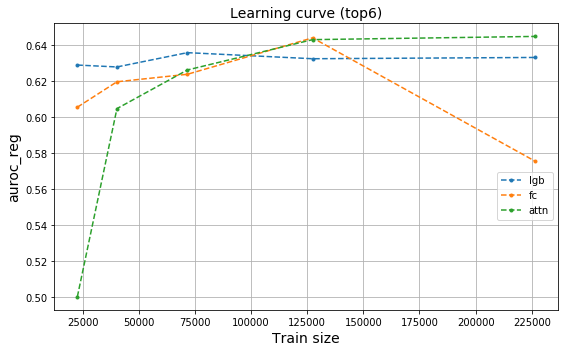

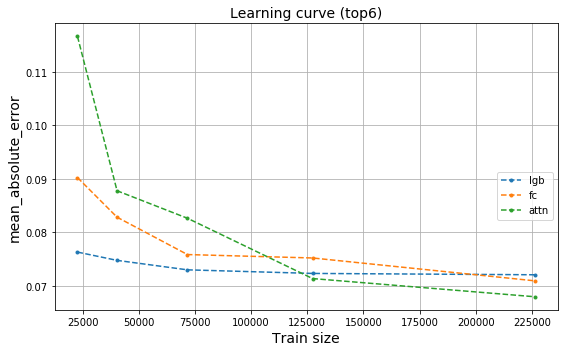

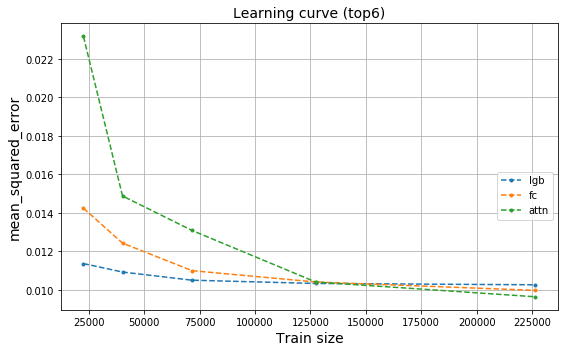

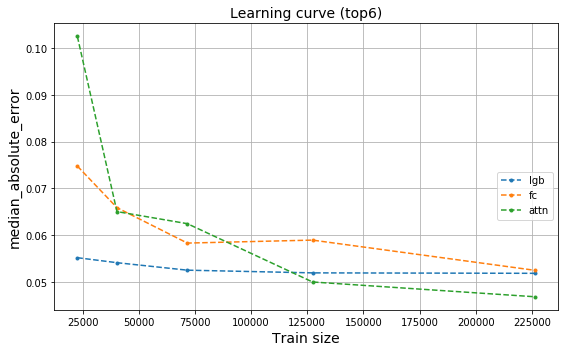

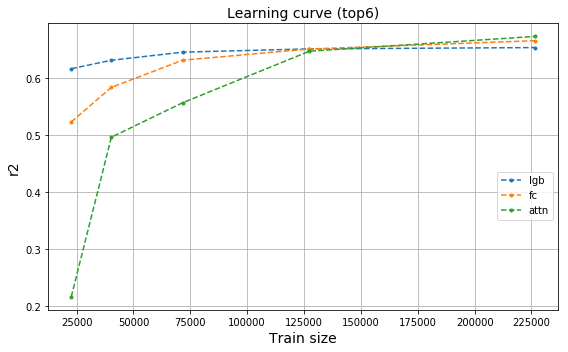

In [10]:
# Same metric for different runs
src_name = 'top6'

for j, mtrc_name in enumerate(df['metric'].unique()):
    plt.figure(figsize=(8, 5))
    
    for i, (k, v) in enumerate(runs.items()):
        df = pd.read_csv(runs[k][1])
        
        d = df[df['metric'] == mtrc_name]  # scores for a specific metric
        # d = d[d['src'] == src_name]  # scores for a specific source
        
        d_vl = d[d['tr_set'] == False]     # scores of val set
        plt.plot(d_vl['tr_size'], d_vl['f0'], '.--', label=runs[k][0])
        
        plt.title(f'Learning curve ({src_name})', fontsize=14)
        
        plt.xlabel('Train size', fontsize=14)
        plt.ylabel(mtrc_name, fontsize=14)
        plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

    plt.tight_layout()
    plt.grid(True)
    
    if save:
        plt.savefig( outdir/(mtrc_name+'.png') )

In [29]:
# https://github.com/bckenstler/CLR

In [37]:
base_lr=0.0001  # 0.001
max_lr=0.001    # 0.006
step_size=2000.
mode='exp_range'
gamma=0.99994
scale_fn=None
scale_mode='cycle'

In [38]:
batch = 32
datasize = 20386
iterations = 20386/batch

In [39]:
cycle = np.floor(1+iterations/(2*step_size))
x = np.abs(iterations/step_size - 2*cycle + 1)
lr= base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))*gamma**(iterations)